<a href="https://colab.research.google.com/github/anaapbernardo/Bootcamp_DataScience/blob/main/Ana_Bernardo_Project_Module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Olá **Cientista**!

Bem vinda e bem vindo ao **mega desafio do Módulo 01**, neste desafio queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação ~~referente a base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade.~~ 

**P.S: Infelizmente o DataSUS está fora do ar por tempo indeterminado, para você não parar seu projeto, adicionamos no [GitHub](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados) do curso, duas novas bases para você utilizar neste projeto (COVID-19 e Óbitos).**

Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.

Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.



E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



## **Summary:**

In this project, I started analyzing the number of hospitalizations in Brazil since 2010. Then, to complement the analysis I also evaluate the population growth and number of hospital beds in the past 10 years.

During the project I notice that **Roraima** had a really different behavior in relation to population growth, and consequently number of hospitalizations and hospital beds. So, I decided to look deeper into the situation of this state (topic 4).

The libraries used were:

In [103]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [104]:
# Setting the number of decimal in floats values

pd.options.display.float_format = '{:.0f}'.format

## **Data Analysis:**

The first steps in a data analysis is read the chosen dataset (Number of Hospitalizations per State) and clean up the data.

### **Reading the dataset and creating a data frame**

In [105]:
hospitalizations = pd.read_csv('https://raw.githubusercontent.com/anaapbernardo/Bootcamp_DataScience/main/Files%20-%20Bootcamp%20Data%20Science/Hospitalizations_2010_2020_A104727189_28_143_208.csv', 
                               encoding='ISO-8859-1', sep=';',
                               skiprows=3, skipfooter=12,  
                               na_values='-', thousands='.', decimal=',', engine='python')
hospitalizations.head()

,Unidade da Federação,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,nan,nan,1,nan,nan,1,7,35,286,1204,3513,8670,7945,9036,8551,8622,7861,8332,8618,8403,8182,8293,7930,7821,7785,8691,8836,8274,8195,7814,8681,7918,8245,8254,7422,8153,7955,8570,8422,...,9406,9453,10057,9594,10208,9734,9668,9775,9161,10508,10333,10913,10051,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9833,9477,8554,7029,7187,6573,5874,2871,1161501
1,12 Acre,1,nan,nan,nan,nan,3,9,50,320,678,1808,4034,3624,4556,4508,4293,3963,3958,4102,4156,4406,4124,4054,4621,4129,4573,4344,4859,4355,4311,4304,4234,4118,4148,4116,4524,3892,4580,4266,...,3857,3920,4025,3826,3990,3956,3666,3963,3523,3964,4010,3948,3844,3963,4054,3784,3959,3117,3024,3509,3162,3259,3589,4065,3986,4032,3872,3971,4112,3650,3596,3838,3789,3603,2748,2559,2417,1621,nan,512252
2,13 Amazonas,2,nan,nan,nan,nan,2,24,163,2159,4339,9900,13542,12401,14616,13674,13545,13197,13188,13595,13485,14067,13212,13308,13978,13488,15187,14388,13665,13539,13345,13716,13051,13756,14317,11684,13007,12189,14762,14168,...,15137,14971,15555,14415,15447,14493,14329,15371,13688,15559,15958,16321,15376,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16322,16877,15974,15379,16502,15398,15245,12206,13101,13062,12177,5579,1819558
3,14 Roraima,nan,nan,nan,nan,1,nan,1,24,161,515,1005,2568,2277,2828,2590,2984,3028,3085,3099,2800,2658,2528,2382,2541,1984,2077,2185,2620,2596,2568,2735,2837,2702,2669,2543,2463,2556,2811,2620,...,3773,3727,3814,3735,3760,3621,3522,3663,3242,3477,3416,3727,3813,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2582,2856,2863,2811,2205,388027
4,15 Pará,1,nan,nan,nan,nan,2,51,324,2917,9081,24975,43745,42286,48037,44248,46360,43746,41934,45673,44367,42910,43087,42265,44268,42044,46579,42490,43492,41299,38734,43303,42302,41776,42089,40971,42733,40570,45619,42935,...,39699,39191,41852,40184,41739,40430,38412,40951,37788,42206,43040,43194,41049,40483,42650,41033,43606,39448,38237,41265,38062,41238,40082,40816,36955,40696,40637,41050,42376,40387,38943,41347,38500,37483,28370,30105,28249,25173,13695,5181582


In [106]:
hospitalizations.tail()

,Unidade da Federação,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,nan,nan,nan,1,4,26,140,845,3680,11102,32630,59683,54080,64897,60314,62529,60718,63078,64043,59741,60225,58004,55019,59554,53992,61470,58049,62426,61120,61119,61506,57716,59073,58085,56091,60761,54893,62888,58759,...,66518,66237,66845,60222,62825,60568,57500,62521,54218,63875,64284,63550,62887,67131,66614,59802,65061,60075,56113,62443,56389,61635,64444,68285,65770,69225,67859,64316,66553,61739,59522,64798,58092,56846,44638,50147,50347,45755,23856,7873163
23,50 Mato Grosso do Sul,nan,nan,nan,nan,1,5,36,206,1328,3576,7922,13342,13084,16236,13851,13625,13129,13006,14588,14086,13251,12945,12268,13317,12779,14153,13631,14134,13112,13269,13007,12673,12521,12792,12211,12848,12837,14344,13190,...,14044,14156,14387,13421,13677,13323,12849,13703,12293,14594,14534,14615,13933,14648,14605,13923,14429,14006,13123,14012,13582,14841,15468,16162,14816,14758,14849,14724,14844,14442,14020,15219,14697,14455,10797,11330,10164,8397,3507,1742775
24,51 Mato Grosso,1,nan,nan,nan,nan,5,39,166,866,2653,7534,15115,13939,16803,15284,15543,14217,14731,15573,15406,14688,14465,14399,14846,13597,15193,14825,14675,14256,13854,15041,14627,14533,14659,14248,14459,13941,16172,15624,...,16291,16149,16379,15806,15873,14800,14317,15425,14307,17145,16825,17021,16036,16427,16308,15615,16561,15139,14447,15742,15054,16601,16936,17606,16340,16851,16797,16697,17198,15662,14489,15921,14873,15016,11462,12190,11072,9958,6510,1969874
25,52 Goiás,2,nan,nan,nan,nan,3,39,143,950,3359,11902,32623,30627,35019,32086,31381,29121,28403,32536,32248,29740,29536,27917,29938,28997,33829,30013,29668,27611,28496,30702,29736,29264,28572,26054,27950,27873,30700,28945,...,27343,26852,28932,26765,28296,26454,25708,27719,25480,29211,28481,28692,26401,26744,27909,27232,27709,26380,25947,27589,26353,28366,30316,30868,28249,28659,29103,28720,29568,27559,26935,28557,26999,26171,20519,21856,21558,19411,12930,3627092
26,53 Distrito Federal,1,nan,nan,nan,3,7,37,166,886,2572,8453,15434,14567,17306,16292,16707,14863,15301,16281,15900,15454,14697,14093,15321,15093,16675,16468,16519,15286,15199,16510,15795,15388,15213,14322,15390,14774,16407,15850,...,16987,15806,17143,16192,17063,15613,15472,16630,15458,18084,17561,18035,16899,17108,17576,17661,17534,17409,17158,18334,18045,19814,20498,20370,18496,19792,20342,19898,20198,17807,17381,18315,17616,18052,15845,16608,15591,14787,10957,2060671


In [107]:
hospitalizations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 141 entries, Unidade da Federação to Total
dtypes: float64(7), int64(133), object(1)
memory usage: 29.9+ KB


###**Cleaning the data:**

For this project I chose to work with the data from 2010, as the dataset used did not have all the information about the year before. So, I removed all the columns from 2009.

In [108]:
# Removing columns from 2009

hosp_since_2010 = hospitalizations.drop(hospitalizations.columns[1:12], axis=1)
hosp_since_2010.head()

,Unidade da Federação,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,8670,7945,9036,8551,8622,7861,8332,8618,8403,8182,8293,7930,7821,7785,8691,8836,8274,8195,7814,8681,7918,8245,8254,7422,8153,7955,8570,8422,8605,8013,7832,7917,7448,7948,7605,7318,8123,8072,9354,...,9406,9453,10057,9594,10208,9734,9668,9775,9161,10508,10333,10913,10051,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9833,9477,8554,7029,7187,6573,5874,2871,1161501
1,12 Acre,4034,3624,4556,4508,4293,3963,3958,4102,4156,4406,4124,4054,4621,4129,4573,4344,4859,4355,4311,4304,4234,4118,4148,4116,4524,3892,4580,4266,4375,4388,4724,4449,4512,4647,4401,4008,4430,3867,4569,...,3857,3920,4025,3826,3990,3956,3666,3963,3523,3964,4010,3948,3844,3963,4054,3784,3959,3117,3024,3509,3162,3259,3589,4065,3986,4032,3872,3971,4112,3650,3596,3838,3789,3603,2748,2559,2417,1621,nan,512252
2,13 Amazonas,13542,12401,14616,13674,13545,13197,13188,13595,13485,14067,13212,13308,13978,13488,15187,14388,13665,13539,13345,13716,13051,13756,14317,11684,13007,12189,14762,14168,14677,13942,14254,14202,12926,13946,13310,12289,15031,12385,13776,...,15137,14971,15555,14415,15447,14493,14329,15371,13688,15559,15958,16321,15376,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16322,16877,15974,15379,16502,15398,15245,12206,13101,13062,12177,5579,1819558
3,14 Roraima,2568,2277,2828,2590,2984,3028,3085,3099,2800,2658,2528,2382,2541,1984,2077,2185,2620,2596,2568,2735,2837,2702,2669,2543,2463,2556,2811,2620,3019,2655,2529,2663,2395,1970,2519,2289,2597,2314,2779,...,3773,3727,3814,3735,3760,3621,3522,3663,3242,3477,3416,3727,3813,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2582,2856,2863,2811,2205,388027
4,15 Pará,43745,42286,48037,44248,46360,43746,41934,45673,44367,42910,43087,42265,44268,42044,46579,42490,43492,41299,38734,43303,42302,41776,42089,40971,42733,40570,45619,42935,43561,38977,37421,38712,40217,39910,38601,35924,41496,38305,43818,...,39699,39191,41852,40184,41739,40430,38412,40951,37788,42206,43040,43194,41049,40483,42650,41033,43606,39448,38237,41265,38062,41238,40082,40816,36955,40696,40637,41050,42376,40387,38943,41347,38500,37483,28370,30105,28249,25173,13695,5181582


In [109]:
# Setting index

hosp_since_2010 = hosp_since_2010.set_index('Unidade da Federação')
hosp_since_2010.head()

,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,8670,7945,9036,8551,8622,7861,8332,8618,8403,8182,8293,7930,7821,7785,8691,8836,8274,8195,7814,8681,7918,8245,8254,7422,8153,7955,8570,8422,8605,8013,7832,7917,7448,7948,7605,7318,8123,8072,9354,9352,...,9406,9453,10057,9594,10208,9734,9668,9775,9161,10508,10333,10913,10051,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9833,9477,8554,7029,7187,6573,5874,2871,1161501
12 Acre,4034,3624,4556,4508,4293,3963,3958,4102,4156,4406,4124,4054,4621,4129,4573,4344,4859,4355,4311,4304,4234,4118,4148,4116,4524,3892,4580,4266,4375,4388,4724,4449,4512,4647,4401,4008,4430,3867,4569,4513,...,3857,3920,4025,3826,3990,3956,3666,3963,3523,3964,4010,3948,3844,3963,4054,3784,3959,3117,3024,3509,3162,3259,3589,4065,3986,4032,3872,3971,4112,3650,3596,3838,3789,3603,2748,2559,2417,1621,nan,512252
13 Amazonas,13542,12401,14616,13674,13545,13197,13188,13595,13485,14067,13212,13308,13978,13488,15187,14388,13665,13539,13345,13716,13051,13756,14317,11684,13007,12189,14762,14168,14677,13942,14254,14202,12926,13946,13310,12289,15031,12385,13776,13867,...,15137,14971,15555,14415,15447,14493,14329,15371,13688,15559,15958,16321,15376,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16322,16877,15974,15379,16502,15398,15245,12206,13101,13062,12177,5579,1819558
14 Roraima,2568,2277,2828,2590,2984,3028,3085,3099,2800,2658,2528,2382,2541,1984,2077,2185,2620,2596,2568,2735,2837,2702,2669,2543,2463,2556,2811,2620,3019,2655,2529,2663,2395,1970,2519,2289,2597,2314,2779,2710,...,3773,3727,3814,3735,3760,3621,3522,3663,3242,3477,3416,3727,3813,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2582,2856,2863,2811,2205,388027
15 Pará,43745,42286,48037,44248,46360,43746,41934,45673,44367,42910,43087,42265,44268,42044,46579,42490,43492,41299,38734,43303,42302,41776,42089,40971,42733,40570,45619,42935,43561,38977,37421,38712,40217,39910,38601,35924,41496,38305,43818,44692,...,39699,39191,41852,40184,41739,40430,38412,40951,37788,42206,43040,43194,41049,40483,42650,41033,43606,39448,38237,41265,38062,41238,40082,40816,36955,40696,40637,41050,42376,40387,38943,41347,38500,37483,28370,30105,28249,25173,13695,5181582


Checking if there are more non-numeric values (expressed as ' nan ' )  in the data frame

In [110]:
hosp_since_2010.isna().sum().sum()

1

There is just one non-numeric value in Acre (Ago/2020).

For this specific case, I chose to replace the non-numeric value by the mean of the past months of the year 2020 (Jan-Jul). 

In [111]:
# Mean of hospitalizations in the Acre from January to July 2020
acre = hosp_since_2010.iloc[1]
year_2020 = hosp_since_2010.columns[-9:-2]

acre_2020_mean = int(acre[year_2020].mean())
acre_2020_mean

2939

In [112]:
# Replacing NaN by the mean

hosp_since_2010.fillna(value=acre_2020_mean, inplace=True)

In [113]:
hosp_since_2010.head()

,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,8670,7945,9036,8551,8622,7861,8332,8618,8403,8182,8293,7930,7821,7785,8691,8836,8274,8195,7814,8681,7918,8245,8254,7422,8153,7955,8570,8422,8605,8013,7832,7917,7448,7948,7605,7318,8123,8072,9354,9352,...,9406,9453,10057,9594,10208,9734,9668,9775,9161,10508,10333,10913,10051,10068,10339,9821,10357,10086,9561,9448,9580,10572,10785,11290,9995,9940,9942,10147,10367,10365,9861,9833,9477,8554,7029,7187,6573,5874,2871,1161501
12 Acre,4034,3624,4556,4508,4293,3963,3958,4102,4156,4406,4124,4054,4621,4129,4573,4344,4859,4355,4311,4304,4234,4118,4148,4116,4524,3892,4580,4266,4375,4388,4724,4449,4512,4647,4401,4008,4430,3867,4569,4513,...,3857,3920,4025,3826,3990,3956,3666,3963,3523,3964,4010,3948,3844,3963,4054,3784,3959,3117,3024,3509,3162,3259,3589,4065,3986,4032,3872,3971,4112,3650,3596,3838,3789,3603,2748,2559,2417,1621,2939,512252
13 Amazonas,13542,12401,14616,13674,13545,13197,13188,13595,13485,14067,13212,13308,13978,13488,15187,14388,13665,13539,13345,13716,13051,13756,14317,11684,13007,12189,14762,14168,14677,13942,14254,14202,12926,13946,13310,12289,15031,12385,13776,13867,...,15137,14971,15555,14415,15447,14493,14329,15371,13688,15559,15958,16321,15376,16276,16129,15388,16098,15183,14726,16056,14900,16965,16363,16663,16043,16828,17190,16322,16877,15974,15379,16502,15398,15245,12206,13101,13062,12177,5579,1819558
14 Roraima,2568,2277,2828,2590,2984,3028,3085,3099,2800,2658,2528,2382,2541,1984,2077,2185,2620,2596,2568,2735,2837,2702,2669,2543,2463,2556,2811,2620,3019,2655,2529,2663,2395,1970,2519,2289,2597,2314,2779,2710,...,3773,3727,3814,3735,3760,3621,3522,3663,3242,3477,3416,3727,3813,3939,4048,3814,3779,3258,3286,3516,3329,3463,3636,3632,3507,3922,4084,3956,4199,3925,3551,3731,3593,3452,2582,2856,2863,2811,2205,388027
15 Pará,43745,42286,48037,44248,46360,43746,41934,45673,44367,42910,43087,42265,44268,42044,46579,42490,43492,41299,38734,43303,42302,41776,42089,40971,42733,40570,45619,42935,43561,38977,37421,38712,40217,39910,38601,35924,41496,38305,43818,44692,...,39699,39191,41852,40184,41739,40430,38412,40951,37788,42206,43040,43194,41049,40483,42650,41033,43606,39448,38237,41265,38062,41238,40082,40816,36955,40696,40637,41050,42376,40387,38943,41347,38500,37483,28370,30105,28249,25173,13695,5181582


Sorting the data frame by the total number of hospitalizations from the past 10 years.


In [114]:
# Sorting by total number of hospitalizations

hosp_sorted_total = hosp_since_2010.sort_values('Total', ascending=False)
hosp_sorted_total = hosp_sorted_total.drop(['Total'], axis=1)
hosp_sorted_total.head()

,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,187231,179941,216682,198602,204531,192091,193427,205500,195081,191999,191212,183461,195391,190427,210100,197926,209373,193857,196668,205817,192477,194114,186207,178120,191845,185546,211488,195985,211135,193135,200079,205063,191248,204148,181445,172452,191120,176079,198950,208350,...,215767,203476,205153,213476,200628,207328,196867,187972,202914,185982,214564,211941,213592,205057,207290,214532,200932,214718,200659,192300,208950,196975,210496,217520,225473,207872,214099,216034,211709,220858,203475,194311,212112,197745,192915,144556,161627,164735,166377,114866
31 Minas Gerais,91105,87825,104877,95596,98346,91795,94663,99193,97228,93079,91907,91365,94600,91208,99462,95537,102114,95621,94660,99679,95030,93911,93533,91912,95129,90727,103430,96661,104478,96920,100403,101335,95780,100431,90591,88720,94222,87203,99854,104530,...,107825,101409,101686,105244,98688,101965,98685,96081,102377,90920,106245,106479,106954,103184,106833,108255,101540,107509,101127,98531,103677,97752,105283,110778,115484,105841,111252,108185,106752,109789,102921,100973,104973,97938,96311,76651,82982,78680,72562,44299
29 Bahia,71380,66548,81882,77278,81262,68596,72476,77454,74034,73828,72850,68990,74584,69851,78163,75249,76744,71041,71511,76614,70909,72356,71318,69417,71476,66585,78709,71741,76358,70940,74609,73925,69242,68648,63783,58804,64942,59229,68672,69299,...,72939,66663,69826,71333,65659,68632,65441,62593,68158,59524,69890,70991,72793,66766,71729,72164,68934,72003,66932,64887,67851,64981,68960,72767,77934,68938,75001,73248,71088,74088,68062,63078,67559,64373,63478,47540,47536,44940,40718,23955
41 Paraná,61433,60456,73228,65405,67439,64959,66122,67807,66673,64601,65123,61705,64083,61257,66609,61681,66262,60615,61560,64990,61005,63302,62444,58458,60442,59159,67362,63476,69055,64125,66282,67762,61705,66636,60426,55710,61064,56383,64057,67274,...,75263,70537,71931,74562,69960,71606,70193,65480,70221,64902,75689,75738,75256,73169,76112,76250,71342,76150,72503,66778,72527,70051,74562,76977,79611,72743,77662,74454,73579,75973,71791,67652,72031,70285,67584,52402,54688,47059,41168,24284
43 Rio Grande do Sul,59683,54080,64897,60314,62529,60718,63078,64043,59741,60225,58004,55019,59554,53992,61470,58049,62426,61120,61119,61506,57716,59073,58085,56091,60761,54893,62888,58759,64643,61766,65074,64910,57700,62263,57086,52090,60471,52406,59976,62734,...,68150,66518,66237,66845,60222,62825,60568,57500,62521,54218,63875,64284,63550,62887,67131,66614,59802,65061,60075,56113,62443,56389,61635,64444,68285,65770,69225,67859,64316,66553,61739,59522,64798,58092,56846,44638,50147,50347,45755,23856


## **Hypothesis**

After preparing the data, I raised a few hypotheses:

###**1. Were there changes in the number of hospitalizations from 2010 to 2020?**

The first thing here is to create a line plot to check the behavior of hospitalizations by each state through the past 10 years.

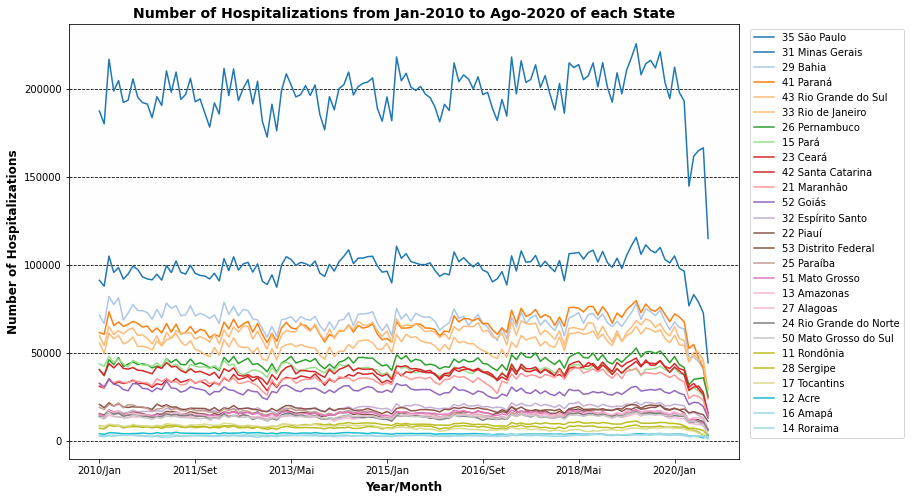

In [115]:
# Line plot from the number of hospitalizations since 2010

hosp_total = hosp_sorted_total.T.plot(figsize=(12,8), cmap='tab20')
hosp_total.set_facecolor('#fefefe')

plt.title('Number of Hospitalizations from Jan-2010 to Ago-2020 of each State', fontweight='bold', fontsize=14)
plt.xlabel('Year/Month', fontweight='bold', fontsize=12)
plt.ylabel('Number of Hospitalizations', fontweight='bold', fontsize=12)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', color='black')
plt.show()

Observing the line plot is difficult say if there was any increase or decrease in the number of hospitalizations since 2010, and to visualize the differences between the states, specially the ones with the lowest numbers of hospitalizations. Also, as 2020 does not yet have all the data, the end of the graph shows a downward behavior, but this does not mean that hospitalizations are decreasing. So this plot is not so helpfull in this case.

Thus, I plotted a **bar graph** comparing the number of hospitalizations on each state in January 2010 and 2020.

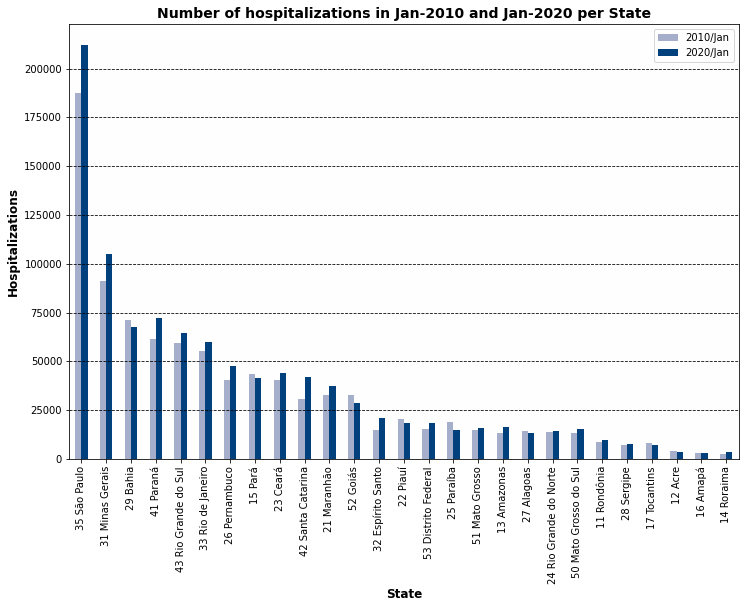

In [116]:
# Bar plot from the number of hospitalizations in 2010 and 2020, January

hosp_Jan10_20 = hosp_sorted_total.plot(y=['2010/Jan', '2020/Jan'], kind='bar', color=['#a5afcb', '#00407d'], figsize=(12,8))
hosp_Jan10_20.set_facecolor('#fefefe')

plt.title('Number of hospitalizations in Jan-2010 and Jan-2020 per State', fontweight='bold', fontsize=14)
plt.xlabel('State', fontweight='bold', fontsize=12)
plt.ylabel('Hospitalizations', fontweight='bold', fontsize=12)
plt.grid(axis='y', linestyle='--', color='black')
plt.show()

Looking at the graph above it is possible to notice an increase in the number of hospitalizations in most states.

The next step is to check the proportion of the increase or decrease in the number of hospitalizations in each state, between Jan-2010 and Jan-2020.

In [117]:
# Calculating the percentage of increase or decrease

hosp_percentage = (hosp_sorted_total['2020/Jan'] - hosp_sorted_total['2010/Jan']) / hosp_sorted_total['2010/Jan'] * 100

In [118]:
# Sorting

hosp_percentage = hosp_percentage.sort_values(ascending=False)
hosp_percentage

Unidade da Federação
14 Roraima                45
32 Espírito Santo         40
42 Santa Catarina         35
13 Amazonas               22
53 Distrito Federal       19
26 Pernambuco             18
41 Paraná                 17
31 Minas Gerais           15
21 Maranhão               15
50 Mato Grosso do Sul     14
11 Rondônia               13
35 São Paulo              13
28 Sergipe                11
23 Ceará                   9
43 Rio Grande do Sul       9
16 Amapá                   8
33 Rio de Janeiro          8
51 Mato Grosso             5
24 Rio Grande do Norte     3
12 Acre                   -5
29 Bahia                  -5
15 Pará                   -5
27 Alagoas                -7
22 Piauí                 -10
52 Goiás                 -12
17 Tocantins             -15
25 Paraíba               -22
dtype: float64

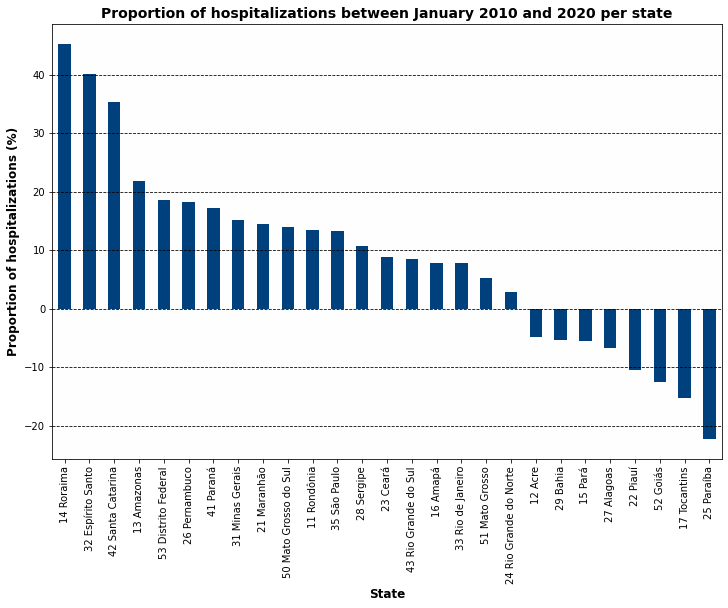

In [119]:
# Bar plot of the percentage increase or decrease in the number of hospitalizations

hosp_percentage_plot = hosp_percentage.plot(kind='bar', color=['#00407d'], figsize=(12,8))
hosp_percentage_plot.set_facecolor('#fefefe')

plt.title('Proportion of hospitalizations between January 2010 and 2020 per state', fontweight='bold', fontsize=14)
plt.xlabel('State', fontweight='bold', fontsize=12)
plt.ylabel('Proportion of hospitalizations (%)', fontweight='bold', fontsize=12)
plt.grid(axis='y', linestyle='--', color='black')
plt.show()

According to the results, we can notice that in 2020 there was an increase in the number of hospitalizations in 19 states, compared to January 2010. Roraima, Espírito Santo and Santa Catarina showed the highest numbers, increasing in 45, 40, and 35%, respectively. While other 8 states showed a decrease in hospitalizations compared to 2010.

Observing this result I thought of another question, is the increase of hospitalizations related to an increase in the total population?

### **2. Is the increase of hospitalizations related to the population growth?**

In [120]:
# IBGE - Data of Brazilian Population 

population = pd.read_excel('https://github.com/anaapbernardo/Bootcamp_DataScience/blob/main/Files%20-%20Bootcamp%20Data%20Science/BrazilianPopulation_2001_2020_IBGE.xls?raw=true', skiprows=4, skipfooter=10)
population = population.drop(population.index[[0,1,2,10,20,25,29]])
population = population.drop(population.columns[1:10], axis=1)
population = population.drop('Unidades da Federação', axis=1)

In [121]:
# Setting index with the states' name and removing the column with the states name

population = population.set_index(hosp_since_2010.index)
population

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,
11 Rondônia,1560501,1576455,1590011,1728214,1748531,1768204,1787279,1805788,1757589,1777225,1796460
12 Acre,732793,746386,758786,776463,790101,803513,816687,829619,869265,881935,894470
13 Amazonas,3480937,3538387,3590985,3807921,3873743,3938336,4001667,4063614,4080611,4144597,4207714
14 Roraima,451227,460165,469524,488072,496936,505665,514229,522636,576568,605761,631181
15 Pará,7603239,7688593,7792561,7969654,8073924,8175113,8272724,8366628,8513497,8602865,8690745
16 Amapá,668689,684309,698602,734996,750912,766679,782295,797722,829494,845731,861773
17 Tocantins,1383453,1400892,1417694,1478164,1496880,1515126,1532902,1550194,1555229,1572866,1590248
21 Maranhão,6569683,6645761,6714314,6794301,6850884,6904241,6954036,7000229,7035055,7075181,7114598
22 Piauí,3119015,3140328,3160748,3184166,3194718,3204028,3212180,3219257,3264531,3273227,3281480


In [122]:
# Sorting by population in 2020

population_sorted = population.sort_values(2020, ascending=False)

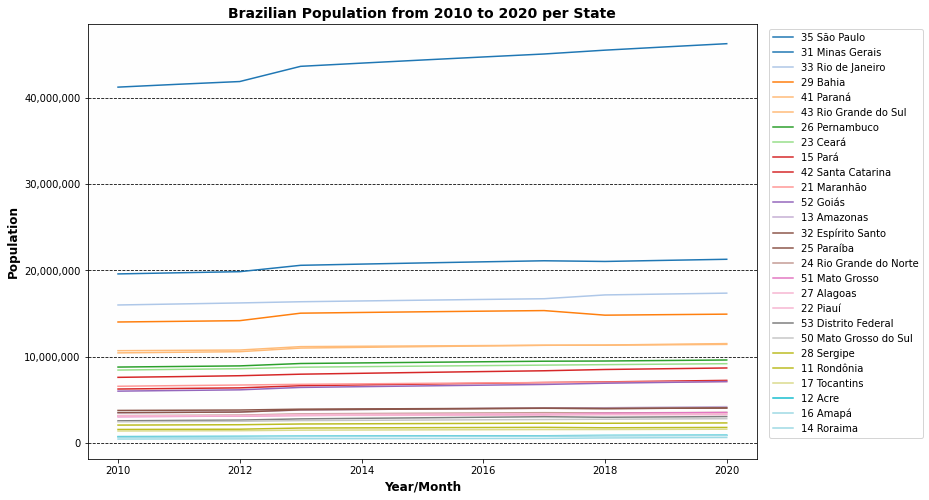

In [123]:
# Line plot of the Brazilian population since 2010

pop = population_sorted.T.plot(figsize=(12,8), cmap='tab20')
pop.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
pop.set_facecolor('#fefefe')

plt.title('Brazilian Population from 2010 to 2020 per State', fontweight='bold', fontsize=14)
plt.xlabel('Year/Month', fontweight='bold', fontsize=12)
plt.ylabel('Population', fontweight='bold', fontsize=12)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', color='black')
plt.show()

Observing the line graph above, except for São Paulo, Minas Gerais, and Rio de Janeiro, it is not possible to indicate which other states had an increase or even decrease in the population numbers. Therefore, the next graph will be a bar plot comparing the years 2010 and 2020.

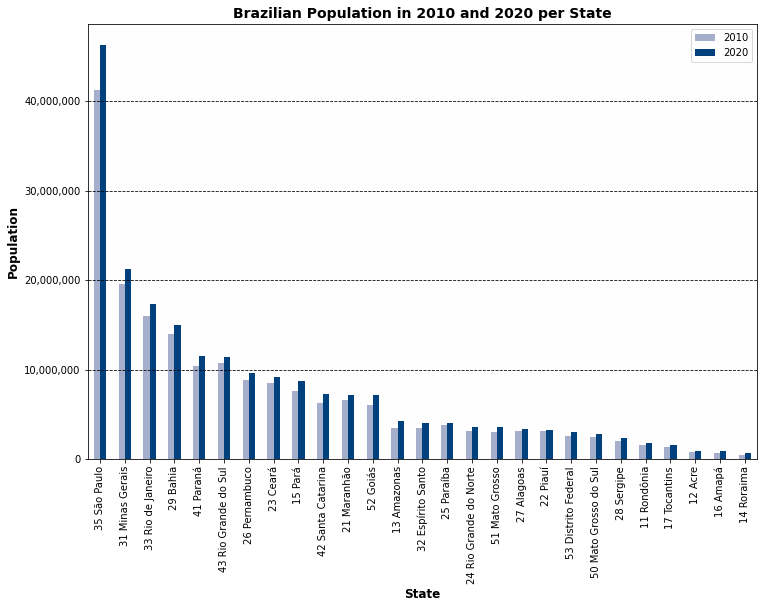

In [124]:
# Bar plot from the number of hospitalizations in 2010 and 2020, January

pop_10_20 = population_sorted.plot(y=[2010, 2020], kind='bar', color=['#a5afcb', '#00407d'], figsize=(12,8))
pop_10_20.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
pop_10_20.set_facecolor('#fefefe')

plt.title('Brazilian Population in 2010 and 2020 per State', fontweight='bold', fontsize=14)
plt.xlabel('State', fontweight='bold', fontsize=12)
plt.ylabel('Population', fontweight='bold', fontsize=12)
plt.grid(axis='y', linestyle='--', color='black')
plt.show()

Looking at the graph above we can notice that all states had an increase in the population through this 10 years.

Knowing this result, we can also check the percentage of the population increase between 2010 and 2020. 

So first, let's take a look at the total increase in the Brazilian population:

In [125]:
# Checking the total increase in the Brazilian Population comparing 2010 and 2020

brazilian_pop_2010 = population_sorted[2010].sum()
brazilian_pop_2020 = population_sorted[2020].sum()

brazilian_pop_percentage = (brazilian_pop_2020 - brazilian_pop_2010) / brazilian_pop_2010 * 100
print(f'The Brazilian population grew {round(brazilian_pop_percentage, 2)}% compared to 2010')

The Brazilian population grew 11.01% compared to 2010


And now, checking the population increase per state.

In [126]:
# Calculating the percentage of increase per state

pop_percentage = (population_sorted[2020] - population_sorted[2010]) / population_sorted[2010] * 100

In [127]:
# Sorting 

pop_percentage = pop_percentage.sort_values(ascending=False)
pop_percentage

Unidade da Federação
14 Roraima               40
16 Amapá                 29
12 Acre                  22
13 Amazonas              21
53 Distrito Federal      19
52 Goiás                 18
51 Mato Grosso           16
42 Santa Catarina        16
32 Espírito Santo        16
11 Rondônia              15
17 Tocantins             15
50 Mato Grosso do Sul    15
15 Pará                  14
35 São Paulo             12
28 Sergipe               12
24 Rio Grande do Norte   12
41 Paraná                10
26 Pernambuco             9
23 Ceará                  9
31 Minas Gerais           9
33 Rio de Janeiro         9
21 Maranhão               8
27 Alagoas                7
25 Paraíba                7
43 Rio Grande do Sul      7
29 Bahia                  6
22 Piauí                  5
dtype: float64

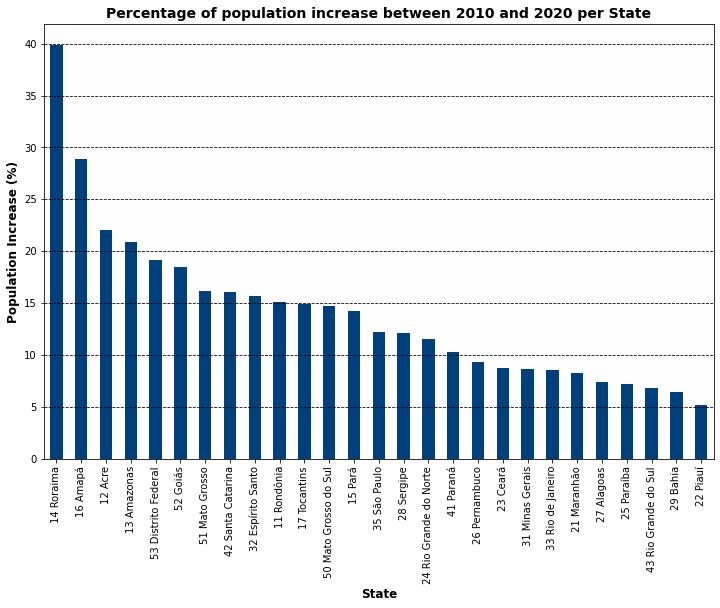

In [128]:
# Bar plot of the percentage of population increase per state

pop_percentage_plot = pop_percentage.plot(kind='bar', color=['#00407d'], figsize=(12,8))
pop_percentage_plot.set_facecolor('#fefefe')

plt.title('Percentage of population increase between 2010 and 2020 per State', fontweight='bold', fontsize=14)
plt.xlabel('State', fontweight='bold', fontsize=12)
plt.ylabel('Population Increase (%)', fontweight='bold', fontsize=12)
plt.grid(axis='y', linestyle='--', color='black')
plt.show()

From the graph above it is possible to observe that all states had an increase in population compared to 2010. Also, what really draws attention in the graph is the sharply increase in the Roraima's population, specially compared to the other states. *This fact will be discussed in more detail at the topic 4.*

Now, I believe that is important to analyze how is the hospitals' capacity. 
So, first I will evaluate how the number of hospital beds are increasing or decreasing as well as the number of hospitalizations are.

### **3. Was there an change in the number of hospital beds in the last 10 years?**

In [129]:
# Number of hospital beds per state 

beds = pd.read_csv('https://raw.githubusercontent.com/anaapbernardo/Bootcamp_DataScience/main/Files%20-%20Bootcamp%20Data%20Science/HospitalBedsSUS_2010_2020_A102712189_28_143_208.csv', 
                     encoding='ISO-8859-1', sep=';', 
                     skiprows=3, skipfooter=12, 
                     na_values='-', thousands='.', decimal=',', engine='python')
beds.head()

,Unidade da Federação,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set
0,11 Rondônia,2616,2634,2634,2660,2697,2706,2704,2690,2877,2882,2863,2863,2870,2870,2872,2885,2898,2899,2965,2965,2969,2994,2973,2973,2955,2958,2959,3047,3038,3039,3121,3128,3115,3118,3119,3119,3131,3155,3204,...,3291,3301,3346,3345,3360,3355,3279,3311,3311,3305,3305,3326,3336,3336,3325,3292,3356,3357,3289,3274,3342,3408,3427,3449,3439,3439,3446,3439,3377,3402,3365,3360,3360,3322,3414,3478,3502,3542,3517,3530
1,12 Acre,1368,1368,1376,1375,1383,1392,1397,1401,1405,1405,1415,1409,1415,1415,1406,1406,1391,1319,1301,1319,1317,1329,1321,1321,1314,1300,1304,1326,1326,1323,1314,1313,1317,1320,1319,1312,1319,1312,1292,...,1251,1251,1251,1263,1263,1297,1297,1297,1303,1304,1304,1304,1304,1304,1307,1307,1308,1311,1308,1297,1324,1327,1360,1374,1363,1367,1375,1357,1357,1355,1355,1350,1350,1364,1372,1463,1463,1506,1597,1581
2,13 Amazonas,4970,4967,5097,5109,5087,5107,5100,5104,5228,5228,5107,5142,5178,5208,5218,5191,5147,5147,5147,5177,5185,5185,5188,5188,5188,5210,5262,5268,5248,5268,5268,5251,5251,5237,5173,5175,5180,5180,5264,...,4843,4855,4967,4950,4962,4976,4949,5023,4930,4911,4937,4961,4964,4966,4952,4955,4959,4930,4939,4944,4927,4927,4933,4925,4918,4917,4894,4905,4895,4895,4899,4899,4914,4916,5184,5270,5168,5174,5126,5126
3,14 Roraima,765,764,760,769,771,771,768,772,772,772,711,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,820,820,818,753,754,754,740,739,739,739,739,739,...,857,877,877,856,856,856,856,856,856,849,970,970,970,970,970,987,988,988,988,988,988,988,988,988,988,1006,1034,1024,1028,1028,1069,1064,1064,1144,1225,1367,1439,1439,1414,1403
4,15 Pará,11514,11554,11519,11543,11508,11505,11523,11465,11451,11482,11406,11405,11443,11444,11482,11471,11456,11388,11386,11241,11260,11114,11121,11144,10956,10955,10958,10949,10932,10846,10819,10801,10836,10869,10916,10896,10867,10918,10927,...,10820,10832,10806,10770,10793,10795,10796,10792,10774,10750,10754,10735,10721,10705,10784,10610,10690,10674,10676,10672,10588,10446,10445,10455,10364,10269,10269,10417,10403,10431,10430,10347,10341,10491,11370,11502,11573,11714,11882,11847


In [130]:
# Setting index

beds = beds.set_index('Unidade da Federação')
beds.head()

,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,2616,2634,2634,2660,2697,2706,2704,2690,2877,2882,2863,2863,2870,2870,2872,2885,2898,2899,2965,2965,2969,2994,2973,2973,2955,2958,2959,3047,3038,3039,3121,3128,3115,3118,3119,3119,3131,3155,3204,3215,...,3291,3301,3346,3345,3360,3355,3279,3311,3311,3305,3305,3326,3336,3336,3325,3292,3356,3357,3289,3274,3342,3408,3427,3449,3439,3439,3446,3439,3377,3402,3365,3360,3360,3322,3414,3478,3502,3542,3517,3530
12 Acre,1368,1368,1376,1375,1383,1392,1397,1401,1405,1405,1415,1409,1415,1415,1406,1406,1391,1319,1301,1319,1317,1329,1321,1321,1314,1300,1304,1326,1326,1323,1314,1313,1317,1320,1319,1312,1319,1312,1292,1209,...,1251,1251,1251,1263,1263,1297,1297,1297,1303,1304,1304,1304,1304,1304,1307,1307,1308,1311,1308,1297,1324,1327,1360,1374,1363,1367,1375,1357,1357,1355,1355,1350,1350,1364,1372,1463,1463,1506,1597,1581
13 Amazonas,4970,4967,5097,5109,5087,5107,5100,5104,5228,5228,5107,5142,5178,5208,5218,5191,5147,5147,5147,5177,5185,5185,5188,5188,5188,5210,5262,5268,5248,5268,5268,5251,5251,5237,5173,5175,5180,5180,5264,5268,...,4843,4855,4967,4950,4962,4976,4949,5023,4930,4911,4937,4961,4964,4966,4952,4955,4959,4930,4939,4944,4927,4927,4933,4925,4918,4917,4894,4905,4895,4895,4899,4899,4914,4916,5184,5270,5168,5174,5126,5126
14 Roraima,765,764,760,769,771,771,768,772,772,772,711,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,822,820,820,818,753,754,754,740,739,739,739,739,739,782,...,857,877,877,856,856,856,856,856,856,849,970,970,970,970,970,987,988,988,988,988,988,988,988,988,988,1006,1034,1024,1028,1028,1069,1064,1064,1144,1225,1367,1439,1439,1414,1403
15 Pará,11514,11554,11519,11543,11508,11505,11523,11465,11451,11482,11406,11405,11443,11444,11482,11471,11456,11388,11386,11241,11260,11114,11121,11144,10956,10955,10958,10949,10932,10846,10819,10801,10836,10869,10916,10896,10867,10918,10927,10883,...,10820,10832,10806,10770,10793,10795,10796,10792,10774,10750,10754,10735,10721,10705,10784,10610,10690,10674,10676,10672,10588,10446,10445,10455,10364,10269,10269,10417,10403,10431,10430,10347,10341,10491,11370,11502,11573,11714,11882,11847


In [131]:
# Checking if there are NaN values

beds.isna().sum().sum()

0

In [132]:
# Sorting

beds_sorted = beds.sort_values('2020/Jan', ascending=False)

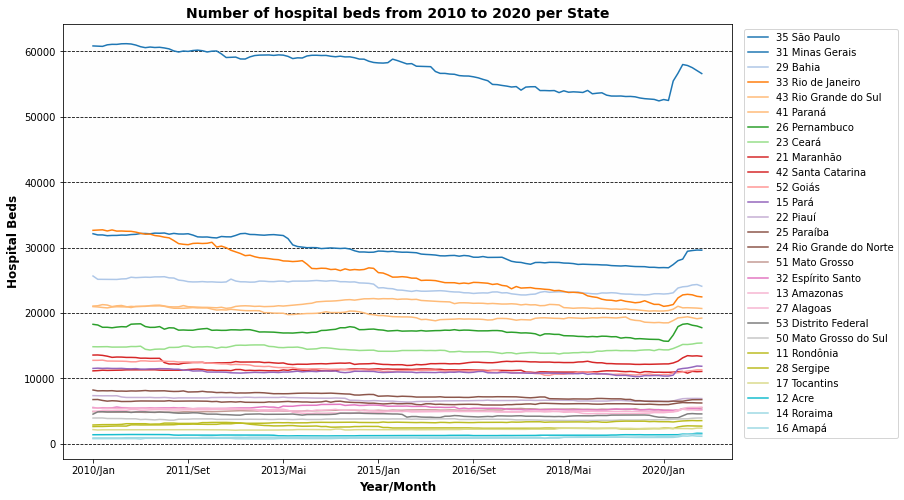

In [133]:
# Line plot of the number of hospital beds

beds_plot = beds_sorted.T.plot(figsize=(12,8), cmap='tab20')
beds_plot.set_facecolor('#fefefe')

plt.title('Number of hospital beds from 2010 to 2020 per State', fontweight='bold', fontsize=14)
plt.xlabel('Year/Month', fontweight='bold', fontsize=12)
plt.ylabel('Hospital Beds', fontweight='bold', fontsize=12)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', color='black')
plt.show()

Analyzing the graph above it is possible to observe a tendency of decrease in the number of hospital beds in most states since 2010. According to website 'Agência Brasil', this reduction is due to maladministration of the public funds.

Source: https://agenciabrasil.ebc.com.br/saude/noticia/2018-07/em-oito-anos-mais-de-342-mil-leitos-do-sus-foram-fechados-diz-cfm

Also, it is possible to identify a peak in the number of hospital beds in the most states at the beginning of 2020. This is probably due to Covid-19 situation, where hospital beds were built to meet the demand of the states.

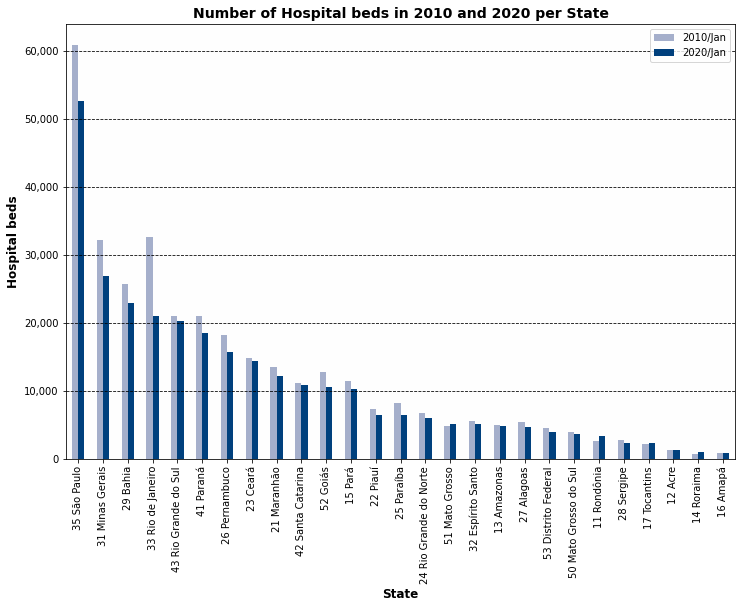

In [134]:
# Bar plot comparing the number of hospital beds in January 2010 and 2020

beds_10_20 = beds_sorted.plot(y=['2010/Jan', '2020/Jan'], kind='bar', color=['#a5afcb', '#00407d'], figsize=(12,8))
beds_10_20.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
beds_10_20.set_facecolor('#fefefe')

plt.title('Number of Hospital beds in 2010 and 2020 per State', fontweight='bold', fontsize=14)
plt.xlabel('State', fontweight='bold', fontsize=12)
plt.ylabel('Hospital beds', fontweight='bold', fontsize=12)
plt.grid(axis='y', linestyle='--', color='black')
plt.show()

In the graph above it is more clear the decrease in the number of hospital beds in most states. 

So, let's check the percentage decrease comparing Jan-2010 and Jan-2020.

In [135]:
# Calculating the percentage of hospital beds between 2010 and 2020

beds_percentage = (beds_sorted['2020/Jan'] - beds_sorted['2010/Jan']) / beds_sorted['2010/Jan'] * 100

In [136]:
# Sorting

beds_percentage = beds_percentage.sort_values(ascending=False)
beds_percentage

Unidade da Federação
14 Roraima                39
11 Rondônia               28
16 Amapá                   7
17 Tocantins               6
51 Mato Grosso             5
12 Acre                   -1
13 Amazonas               -1
42 Santa Catarina         -2
23 Ceará                  -3
43 Rio Grande do Sul      -4
50 Mato Grosso do Sul     -6
32 Espírito Santo         -8
21 Maranhão              -10
15 Pará                  -10
53 Distrito Federal      -10
29 Bahia                 -11
24 Rio Grande do Norte   -11
41 Paraná                -12
22 Piauí                 -12
27 Alagoas               -13
35 São Paulo             -13
26 Pernambuco            -14
31 Minas Gerais          -16
28 Sergipe               -17
52 Goiás                 -17
25 Paraíba               -21
33 Rio de Janeiro        -36
dtype: float64

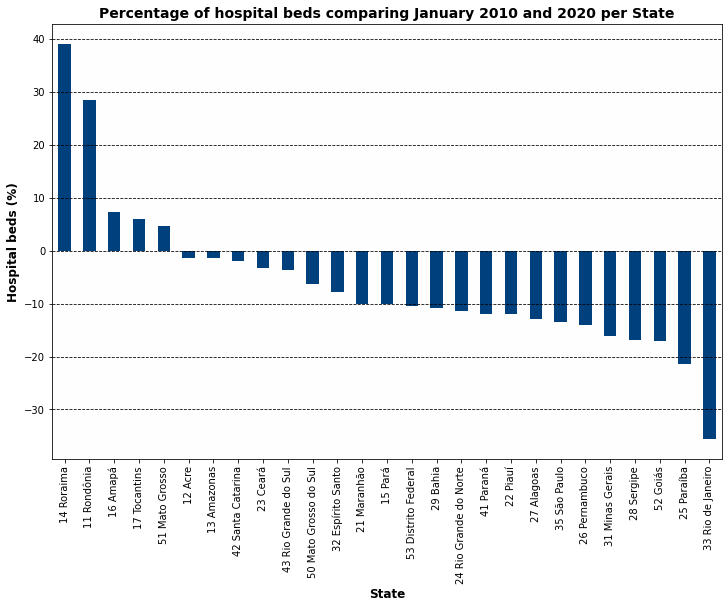

In [137]:
# Bar plot of the percentage of hospital beds per state

beds_percentage_plot = beds_percentage.plot(kind='bar', color=['#00407d'], figsize=(12,8))
beds_percentage_plot.set_facecolor('#fefefe')

plt.title('Percentage of hospital beds comparing January 2010 and 2020 per State', fontweight='bold', fontsize=14)
plt.xlabel('State', fontweight='bold', fontsize=12)
plt.ylabel('Hospital beds (%)', fontweight='bold', fontsize=12)
plt.grid(axis='y', linestyle='--', color='black')
plt.show()

Looking at the percentage of hospital beds offered by SUS comparing Jan-2010 and Jan-2020:
- Most states had more than 10% decrease in the number of hospital beds.
- Rio de Janeiro lost 36% of its hospital beds, from 32642 in Jan-2010 to 21011 in Jan-2020.
- Roraima showed almost 40% increase in the number of hospital beds, from 765 in Jan-2010 to 1064 in Jan-2020. *This will be discussed at the topic 4.* 

Now, let's compare the total numbers of hospital beds in Jan-2010 and Jan-2020 in the whole country.

In [138]:
# Comparing the number of hospital beds in the country in Jan-2010 and Jan-2020

brazilian_beds_2010 = beds_sorted['2010/Jan'].sum()
brazilian_beds_2020 = beds_sorted['2020/Jan'].sum()

brazilian_beds_percentage = (brazilian_beds_2020 - brazilian_beds_2010) / brazilian_beds_2010 * 100
brazilian_beds_percentage

-12.831495353955432

In general, there was almost 13% decrease in the numbers of hospital beds offered by SUS in the whole country, comparing January 2010 with January 2020.

So, evaluating in terms of proportion of hospital bed per inhabitant, how much it decreased?

In [139]:
# Number of hospital beds per 10000 inhabitants in Jan-2010

beds_pop_2010 = (brazilian_beds_2010 / brazilian_pop_2010) * 10000
print(f'In January 2010 there were {int(beds_pop_2010)} per 10000 inhabitants in Brazil')

In January 2010 there were 17 per 10000 inhabitants in Brazil


In [140]:
# Number of hospital beds per 10000 inhabitants in Jan-2020

beds_pop_2020 = (brazilian_beds_2020 / brazilian_pop_2020) * 10000
print(f'In January 2020 the number of hospital beds per 10000 inhabitants in Brazil dropped to {int(beds_pop_2020)}')

In January 2020 the number of hospital beds per 10000 inhabitants in Brazil dropped to 13


**Conclusions:**

Observing the results, it is possible to conclude that, despite to the increase in the Brazilian population, and consequently increase in the number of hospitalizations, there was a reduction in the number of hospital beds, and therefore a reduction in the capacity of SUS hospitals. As mentioning before, much of the problem is due to maladministration of public resources.

A similar analysis related to the number of hospital beds in Brazil was found at the website 'Nexo Jornal', and can be checked in the following link: https://www.nexojornal.com.br/grafico/2020/03/30/Qual-%C3%A9-o-n%C3%BAmero-e-a-distribui%C3%A7%C3%A3o-dos-leitos-de-interna%C3%A7%C3%A3o-pelo-Brasil

### **4. State of Roraima**

Observing the results showed in the topic 2 it is clear that the Roraima's population increased since 2010.

Let's plot a graph to understand when this increasing started.

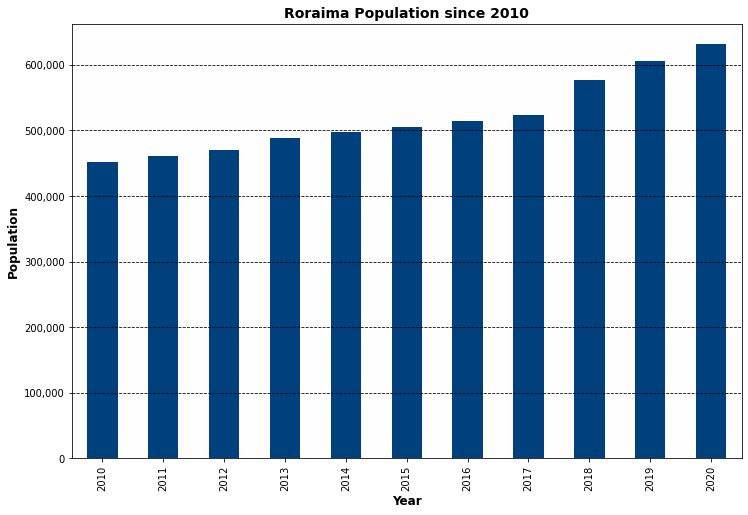

In [141]:
# Bar plot Roraima Population

pop_roraima = population.iloc[3].plot(kind='bar', color=['#00407d'], figsize=(12,8))
pop_roraima.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
pop_roraima.set_facecolor('#fefefe')

plt.title('Roraima Population since 2010', fontweight='bold', fontsize=14)
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Population', fontweight='bold', fontsize=12)
plt.grid(axis='y', linestyle='--', color='black')
plt.show()

In [142]:
# Roraima Population

population.iloc[3]

2010   451227
2011   460165
2012   469524
2013   488072
2014   496936
2015   505665
2016   514229
2017   522636
2018   576568
2019   605761
2020   631181
Name: 14 Roraima, dtype: float64

From 2010 to 2015 the Roraima's population increased around 50000 people. However, from 2015 to 2020 there was an increase of 130000 people in the state, more than double compared to the previous 5 years. In the past 10 years the Roraima's population increased about 40%.



---



**Why is the population of Roraima growing so quickly?**

One of the major factors is the massive migration of Venezuelans, who come to Brazil looking for better living conditions. 

Since 2013 Venezuela has suffered from government instability and the economic crisis. One of the consequences of this was the huge migration of Venezuelans to other countries. Brazil is the fifth country in which Venezuelans most migrate, mainly by the land border in the state of Roraima. However, the state was not prepared for this large flow of immigrants. Additionally, mass migration has several consequences for the state, one of which is on health care, which was not prepared to attend so many people.

In 2018, the Brazilian Government and Unicef ​​developed a program called 'Operação Acolhida' to receive, shelter and relocate immigrants inside the coutry. The relocation of immigrants is very important because Brazil as a whole has the capacity to absorb immigrants, but currently the imigrants is concentrated in the state of Roraima, which has economic consequences for the state.

However, the program is not able to attend all immigrants, and many people end up in vulnerable situations, and living in conditions of misery, hunger, and worsening illnesses. Furthermore, as the situation is often treated as a 'migratory crisis', people are marginalized, and suffer from prejudices and xenophobia from Brazilians, who see the situation as an 'invasion of the country'.

Sources:

https://www.gov.br/acolhida/historico/ https://www.unicef.org/brazil/crise-migratoria-venezuelana-no-brasil

https://mundoeducacao.uol.com.br/geografia/imigracao-venezuelanos-para-brasil.htm

https://agenciabrasil.ebc.com.br/internacional/noticia/2019-05/roraima-pede-apoio-para-conter-impactos-da-migracao-de-venezuelanos

https://folhabv.com.br/noticia/CIDADES/Capital/Roraima-passa-de-600-mil-habitantes--diz-IBGE/56824

Due to to the population growth, it was already expected an increase in the number of hospitalizations in the state. And, it was showed in the topic 1 that the number of hospitalizations in Roraima increased 45% compared to 2010. 

**Let's evaluate this increasing year by year.**

*The evaluation will be until 2019 because we don't have all the data from 2020*

In [143]:
# Slicing a dataframe (hosp_sorted_total) and creating a new dataframe with only the number of hospitalizations in Roraima per month/year

roraima_hosp = hosp_sorted_total[(hosp_sorted_total.index=='14 Roraima')].T
roraima_hosp

Unidade da Federação,14 Roraima
2010/Jan,2568
2010/Fev,2277
2010/Mar,2828
2010/Abr,2590
2010/Mai,2984
...,...
2020/Abr,2582
2020/Mai,2856
2020/Jun,2863
2020/Jul,2811


In [144]:
# Creating a dictionary with the year and it the respective hospitalizations (sum)

jan = 0
first_year = 2010
hosp_year = {}

for dec in range(0, len((roraima_hosp))):
  if dec % 12 == 0 and dec != 0:
    hosp_year[str(first_year)] = roraima_hosp[jan:dec].sum()['14 Roraima']
    first_year = first_year + 1
    jan = dec

hosp_year

{'2010': 32827.0,
 '2011': 30057.0,
 '2012': 30489.0,
 '2013': 33027.0,
 '2014': 32193.0,
 '2015': 34318.0,
 '2016': 37324.0,
 '2017': 43810.0,
 '2018': 43462.0,
 '2019': 44720.0}

In [145]:
# Making the dictionary into a dataframe

roraima_hosp_year = pd.DataFrame.from_dict(data=hosp_year, orient='index', columns=['Internações'])
roraima_hosp_year

,Internações
2010,32827
2011,30057
2012,30489
2013,33027
2014,32193
2015,34318
2016,37324
2017,43810
2018,43462
2019,44720


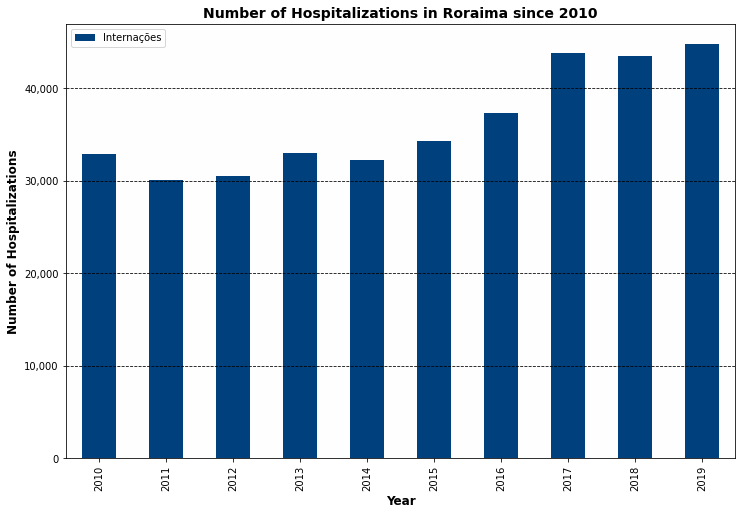

In [146]:
# Bar plot Roraima Hospitalizations

hosp_roraima = roraima_hosp_year.plot(kind='bar', color=['#00407d'], figsize=(12,8))
hosp_roraima.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
hosp_roraima.set_facecolor('#fefefe')

plt.title('Number of Hospitalizations in Roraima since 2010', fontweight='bold', fontsize=14)
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Number of Hospitalizations', fontweight='bold', fontsize=12)
plt.grid(axis='y', linestyle='--', color='black')
plt.show()


Looking at the graph, it is clear that the increase in the number of hospitalizations showed greater increases since 2015, following the same pattern as the population growth in the state.

**Then, let's evaluate the number of hospital beds from 2010 to 2019.**

In [147]:
# Slicing a dataframe (beds_sorted) and creating a new dataframe with only the number of hospitalizations in Roraima per month/year

roraima_beds = beds_sorted[(beds_sorted.index=='14 Roraima')].T
roraima_beds

Unidade da Federação,14 Roraima
2010/Jan,765
2010/Fev,764
2010/Mar,760
2010/Abr,769
2010/Mai,771
...,...
2020/Mai,1367
2020/Jun,1439
2020/Jul,1439
2020/Ago,1414


In [148]:
# Creating a dictionary with the year and it the respective number of beds (mean)
 
jan = 0
first_year = 2010
beds_year = {}

for dec in range(0, len((roraima_beds))):
  if dec % 12 == 0 and dec != 0:
    beds_year[str(first_year)] = int((roraima_beds[jan:dec].sum()['14 Roraima'])/12)
    first_year = first_year + 1
    jan = dec

beds_year

{'2010': 768,
 '2011': 822,
 '2012': 783,
 '2013': 774,
 '2014': 819,
 '2015': 838,
 '2016': 827,
 '2017': 859,
 '2018': 946,
 '2019': 1009}

In [149]:
# Making the dictionary into a dataframe

roraima_beds_year = pd.DataFrame.from_dict(data=beds_year, orient='index', columns=['HospitalBeds'])
roraima_beds_year

,HospitalBeds
2010,768
2011,822
2012,783
2013,774
2014,819
2015,838
2016,827
2017,859
2018,946
2019,1009


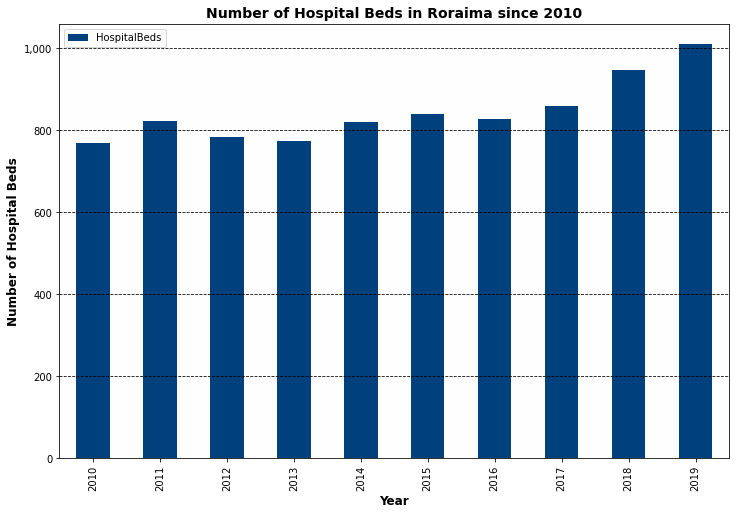

In [150]:
# Bar plot number of Hospital Beds in Roraima

beds_roraima = roraima_beds_year.plot(kind='bar', color=['#00407d'], figsize=(12,8))
beds_roraima.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
beds_roraima.set_facecolor('#fefefe')

plt.title('Number of Hospital Beds in Roraima since 2010', fontweight='bold', fontsize=14)
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Number of Hospital Beds', fontweight='bold', fontsize=12)
plt.grid(axis='y', linestyle='--', color='black')
plt.show()

According to the graph above, it is possible to notice that the number of hospital beds has been increasing in the state, especially since 2017. However, the number of beds offered by SUS is still small and an increase of about 200 beds, while the number of hospitalizations increased by more than 10,000, compared to 2015 with 2019.

## **General Conclusion**

With this project, I was able to evaluate the changes in the number of hospitalization and hospital beds offered by SUS in the last 10 years, and conclude that, despite the continuous increase in the population in the country, and consequently increase in hospitalizations number, the capacity of SUS has been reducing. I believe that it would also be necessary to analyze the private hospital's capacity as well, to better understand the context in which Brazil finds itself in ​​health care.

Also, what most caught my attention in this analysis was the rapid growth of the population of Roraima, which has the smallest population in the country. However, Roraima also presents highest growth rate, mainly due to the migrations as mentioned before. So, it is really important to continue and increase the assistance offered by the 'Operação Acolhida', not only for that the immigrants have a better living condition, but also for that the state has an organized and structured growth.

Therefore, in general, Brazilian health care needs more investments, but more than that it needs better administrators, who will be able to make more efficient use of the public money invested.